We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [50]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-07 12:27:28--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.98, 13.227.198.44, 13.227.198.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 728670 (712K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 711.59K  --.-KB/s    in 0.08s   

2020-05-07 12:27:28 (8.39 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [728670/728670]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [51]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [52]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-03,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-02,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-01,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-04-30,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-04-29,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia


In [53]:
df[df['geoId'] == 'AI']['popData2018'].iloc[0]

nan

To make room in the dataframe for future predictions and smoothed input data, we add columns for those values and set them to missing for now.

In [54]:
df['pcases']  = np.nan
df['scases']  = np.nan
df['pdeaths'] = np.nan
df['sdeaths'] = np.nan

Last check of our source dataframe.

In [55]:
df.count()

dateRep                    15490
day                        15490
month                      15490
year                       15490
cases                      15490
deaths                     15490
countriesAndTerritories    15490
geoId                      15490
countryterritoryCode       15366
popData2018                15319
continentExp               15490
pcases                         0
scases                         0
pdeaths                        0
sdeaths                        0
dtype: int64

We pivot to a country by column format.

In [56]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-03   1.0  561.0  134.0  0.0  0.0   7.0  125.0  6.0  149.0  12.0  ...   
2020-05-04   1.0  564.0  235.0  0.0  0.0   6.0  113.0  0.0  102.0  68.0  ...   
2020-05-05   2.0  567.0  190.0  0.0  0.0   8.0  121.0  0.0  104.0  31.0  ...   
2020-05-06   1.0  462.0  330.0  0.0  0.0  17.0  112.0  1.0  133.0  17.0  ...   
2020-05-07   0.0  546.0  168.0  0.0  0.0  12.0  163.0  0.0  188.0  65.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-05     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-06     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-07     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[129 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add 100 days and check our latest date.

In [57]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('100 days'))
df_geo = df_geo.reindex(new_index)
df_geo.describe()

cases                                                          \
geoId         AD         AE          AF         AG         AI         AL   
count  55.000000  123.00000  119.000000  49.000000  42.000000  60.000000   
mean   13.654545  127.95122   28.504202   0.510204   0.071429  13.866667   
std    12.822460  206.14959   56.610455   1.243692   0.341650   8.106216   
min     0.000000    0.00000    0.000000   0.000000   0.000000   0.000000   
25%     2.000000    0.00000    0.000000   0.000000   0.000000   7.750000   
50%     9.000000    0.00000    0.000000   0.000000   0.000000  12.500000   
75%    21.500000  288.50000   34.500000   0.000000   0.000000  19.250000   
max    43.000000  567.00000  330.000000   6.000000   2.000000  34.000000   

                                                       ... pdeaths            \
geoId          AM         AO          AR           AT  ...      VC   VE   VG   
count  120.000000  47.000000   62.000000   129.000000  ...     0.0  0.0  0.0   
mean    23.183333   0.765957   83.790323   121.325581  ...     NaN  NaN  NaN   
std     35.001076   1.370699   69.554351   216.070054  ...     NaN  NaN  NaN   
min      0.000000   0.000000    0.000000     0.000000  ...     NaN  NaN  NaN   
25%      0.000000   0.000000   12.500000     0.000000  ...     NaN  NaN  NaN   
50%      0.000000   0.000000   86.500000     4.000000  ...     NaN  NaN  NaN   
75%     42.250000   1.000000  131.000000   136.000000  ...     NaN  NaN  NaN   
max    163.000000   6.000000  344.000000  1141.000000  ...     NaN  NaN  NaN   

                                          
geoId   VI   VN   XK   YE   ZA   ZM   ZW  
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
max    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[8 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [58]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    229.000000
mean     478.000000
std       66.250786
min      364.000000
25%      421.000000
50%      478.000000
75%      535.000000
max      592.000000
Name: daynum, dtype: float64

Now for some modeling! The _curve_ can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It has the general shape of a gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola, as we can check for a couple of countries.

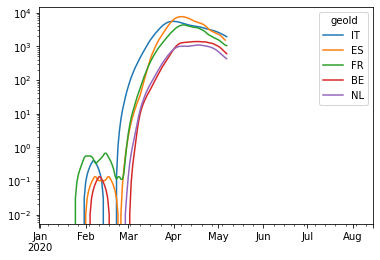

In [59]:
(df_geo['cases'][['IT', 'ES', 'FR', 'BE', 'NL']].rolling(14, win_type='triang').mean()).plot(logy=True)

We create a simple dataframe to contain the source values for our fitting algorithm, with a rolling window to smooth out the target because of the reporting cycle where many of the cases over the weekend end up in the reported data for Tuesdays and Wednesdays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 100 and take the logarithm.

Now we can use polynomial regression to estimate the curve with `polyfit`. We are looking for a parabola, so we use a second order approximation. The outputs are factors a, b, and c for the function `ax^2 + bx + c`. Our fit function cannot handle missing values, but they are already filtered out in the selection above.

The `polyval` function takes the results of `polyfit` and applies them to input data. Once we have the resulting values, we take the exponential and we get the estimated curve.

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change, which is rarely the case.

In [60]:
# Suppress warnings on memory usage of multiple plots

import matplotlib as mpl
mpl.rc('figure', max_open_warning=0)

RU factors [-7.19012900e-04  7.17262079e-01 -1.74860719e+02] residuals 0.07331048793477019
US factors [-8.15852330e-04  7.73640980e-01 -1.78859503e+02] residuals 0.39229470384091136
BR factors [ 2.56696735e-04 -2.22180942e-01  5.10646323e+01] residuals 0.10047734744386294
AT factors [-2.36868636e-03  2.15141454e+00 -4.85739660e+02] residuals 0.5327214826479835
CH factors [-1.16149164e-03  1.06309713e+00 -2.40335078e+02] residuals 1.2684544080291196
DE factors [-8.81347549e-04  8.12655820e-01 -1.83688699e+02] residuals 1.0567626367284746
IT factors [-6.84714426e-04  6.30100871e-01 -1.41261119e+02] residuals 0.6731616744683961
ES factors [-1.24759881e-03  1.15233009e+00 -2.62279857e+02] residuals 1.7363141217103517
FR factors [-9.15409594e-04  8.47390951e-01 -1.92563665e+02] residuals 1.2860465802296757
SE factors [-4.35804728e-04  4.16880910e-01 -9.69351658e+01] residuals 0.5328435344105139
UK factors [-8.74276722e-04  8.32160598e-01 -1.94246524e+02] residuals 0.3659247801550315
IE fact

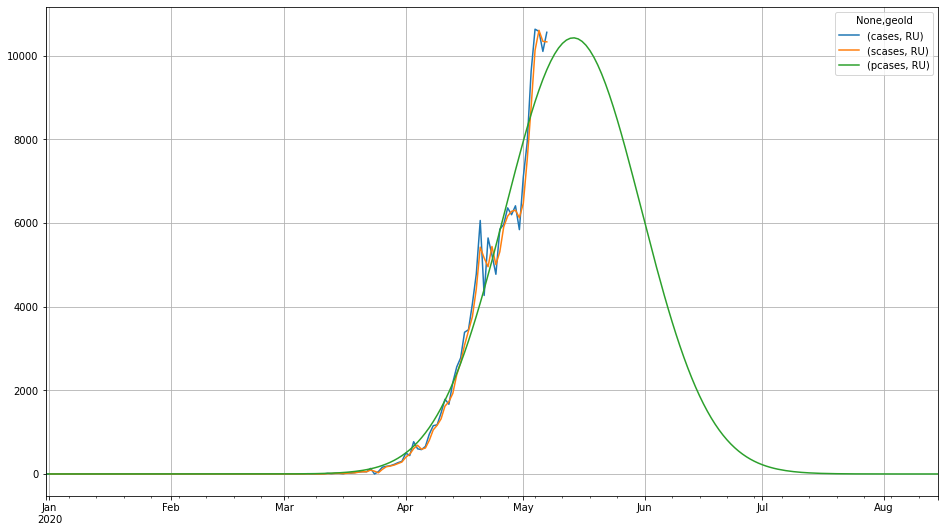

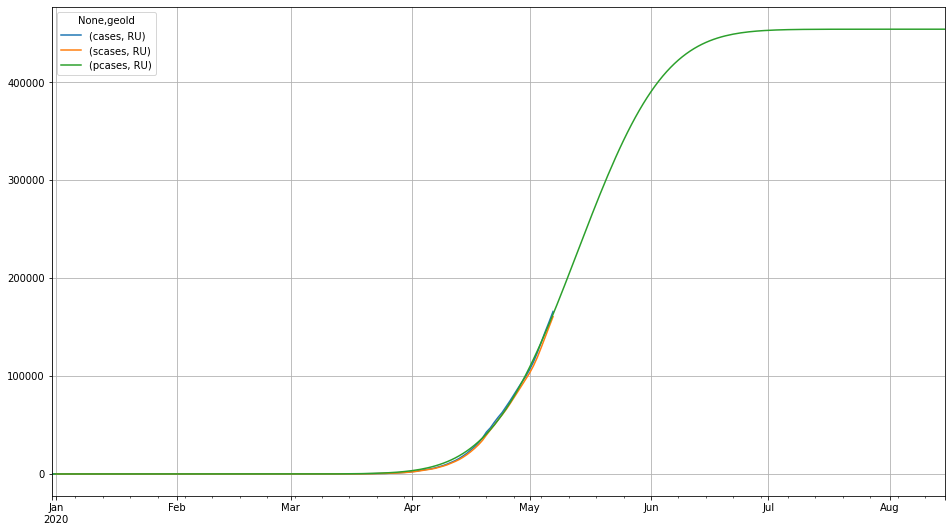

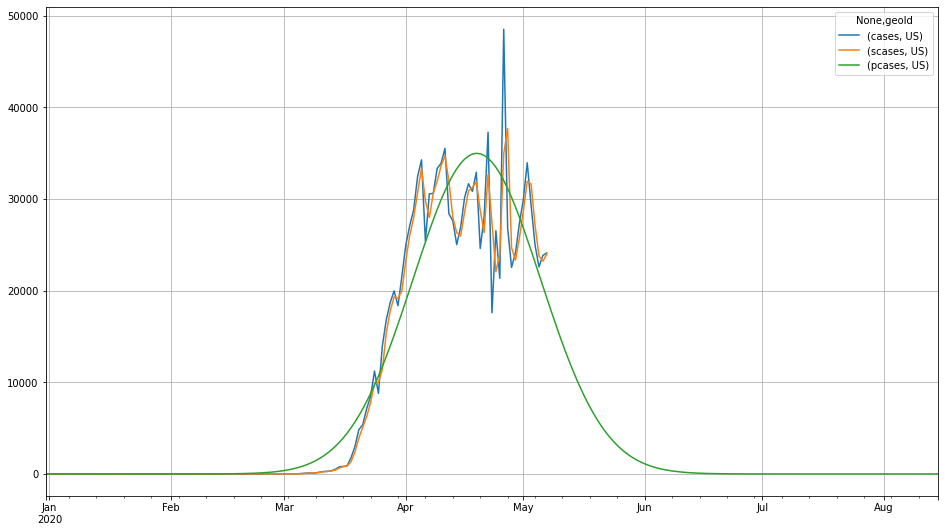

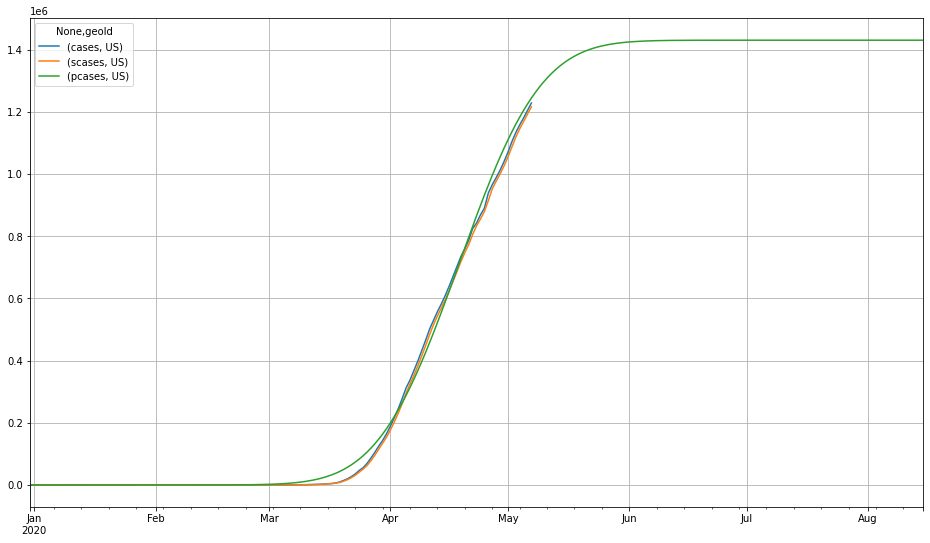

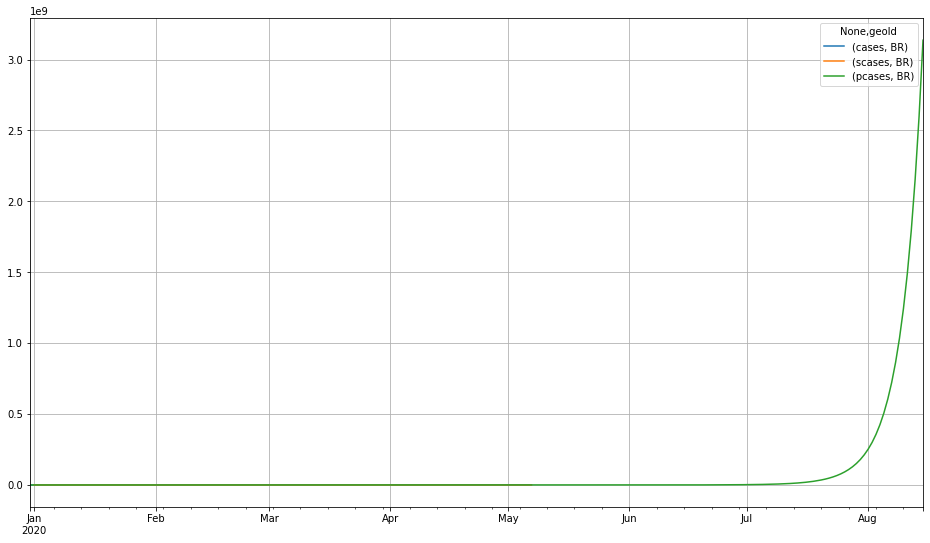

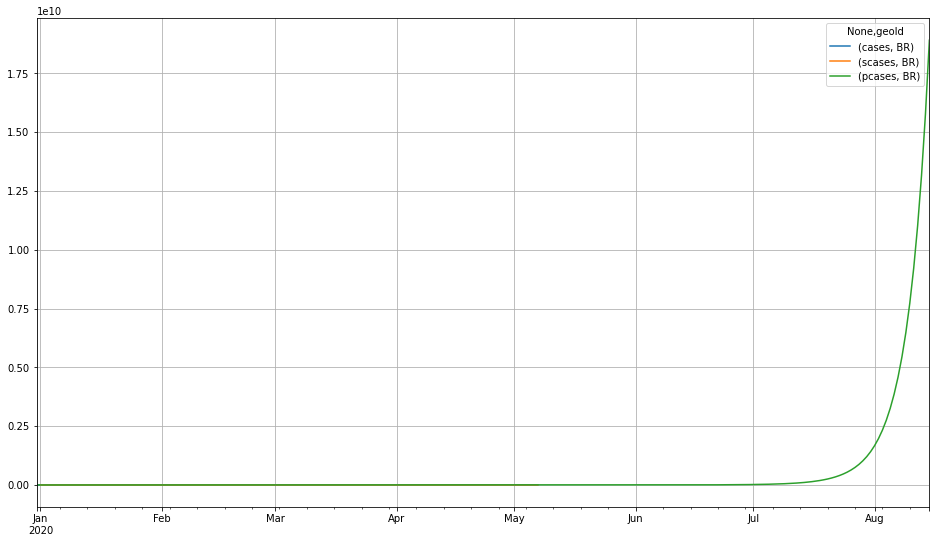

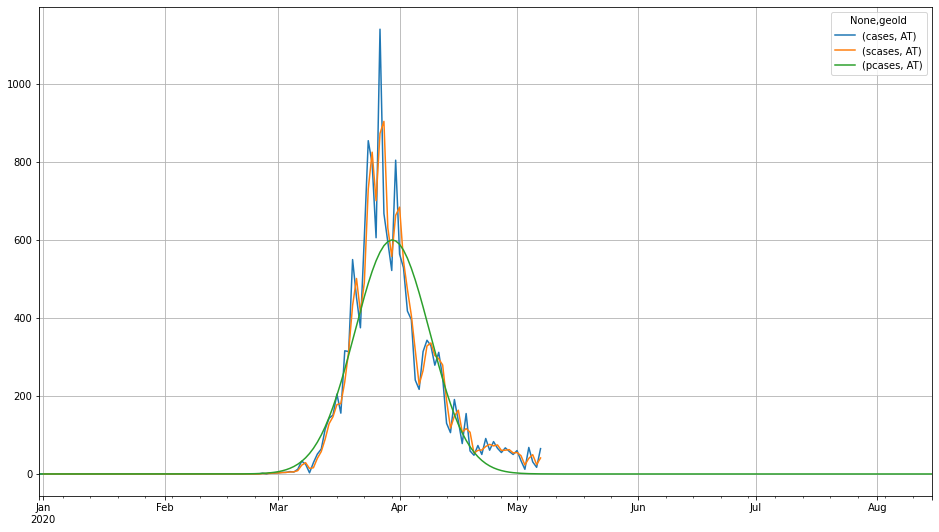

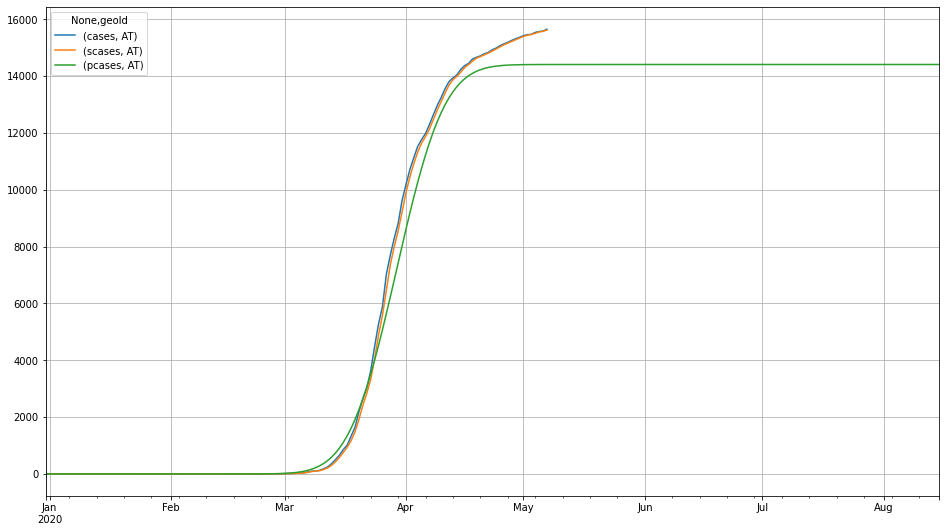

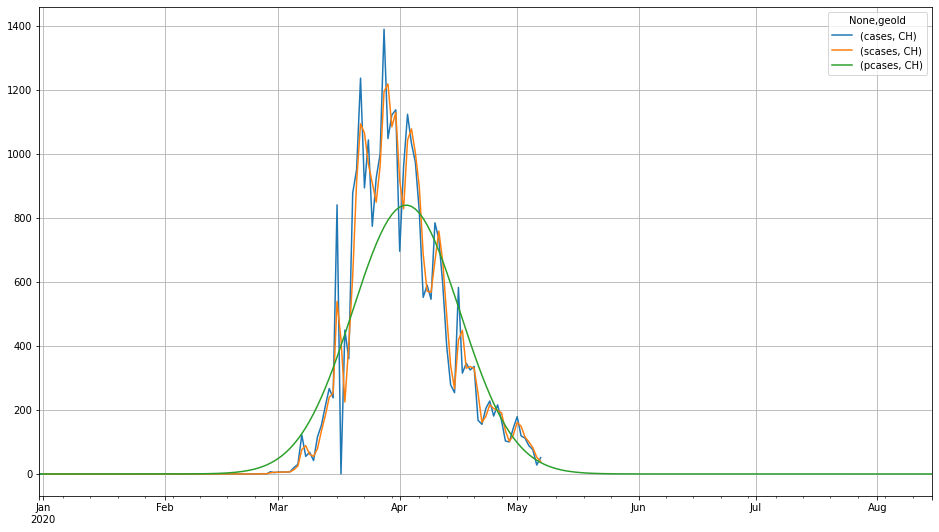

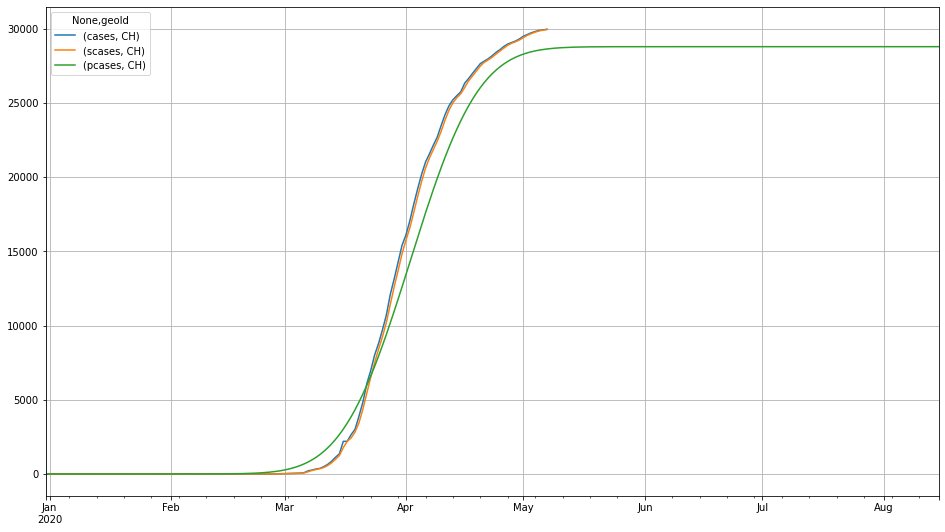

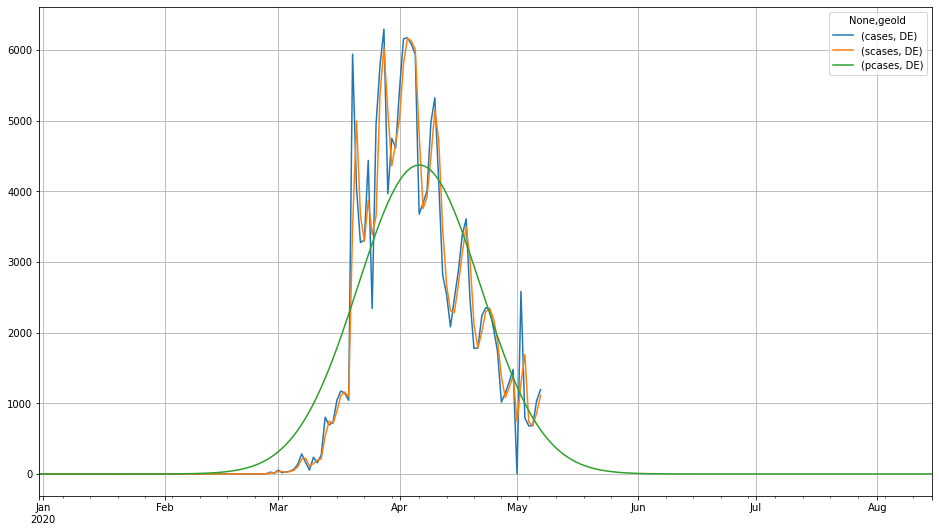

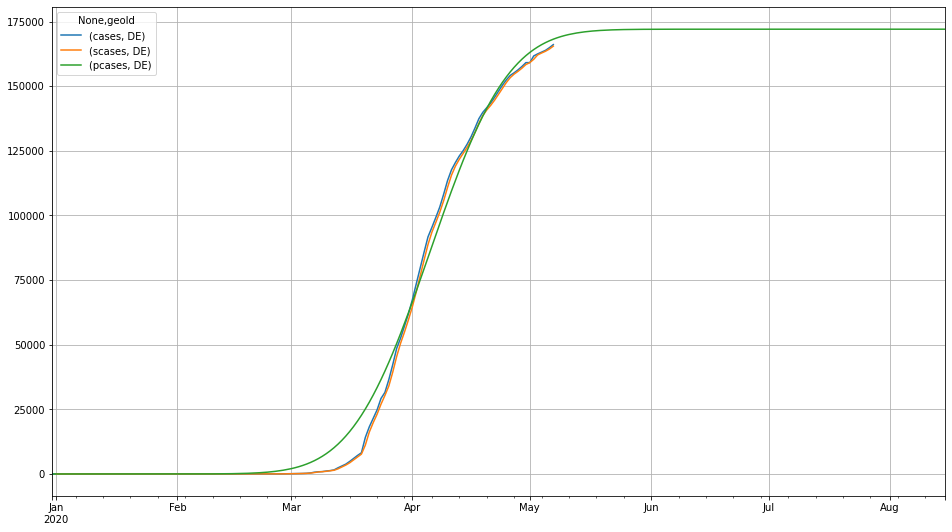

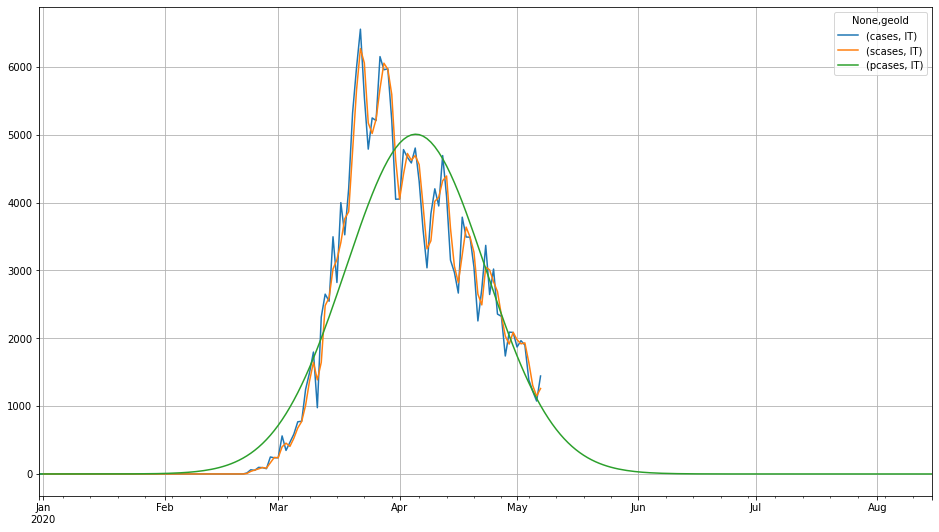

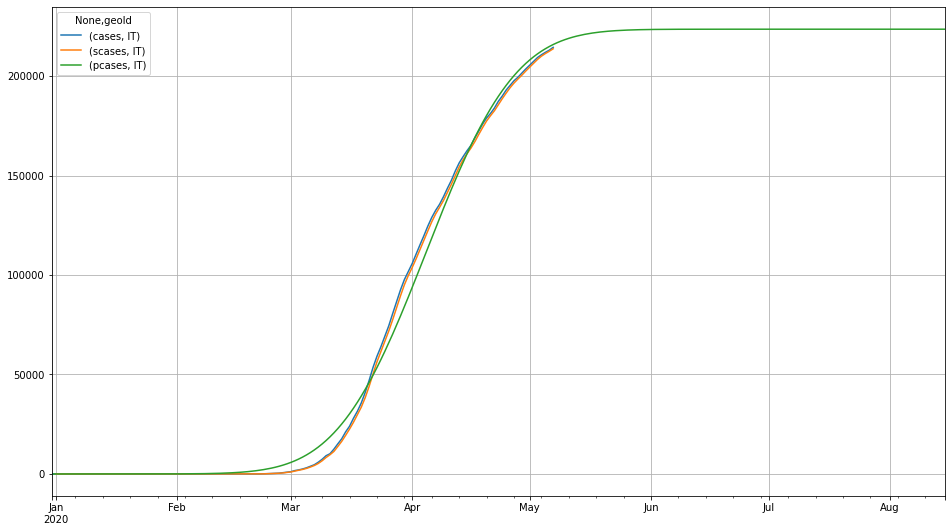

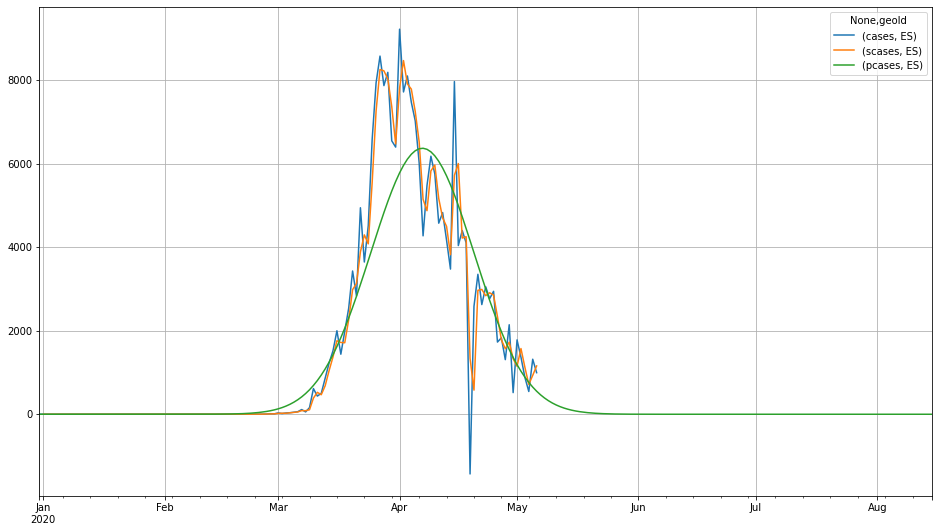

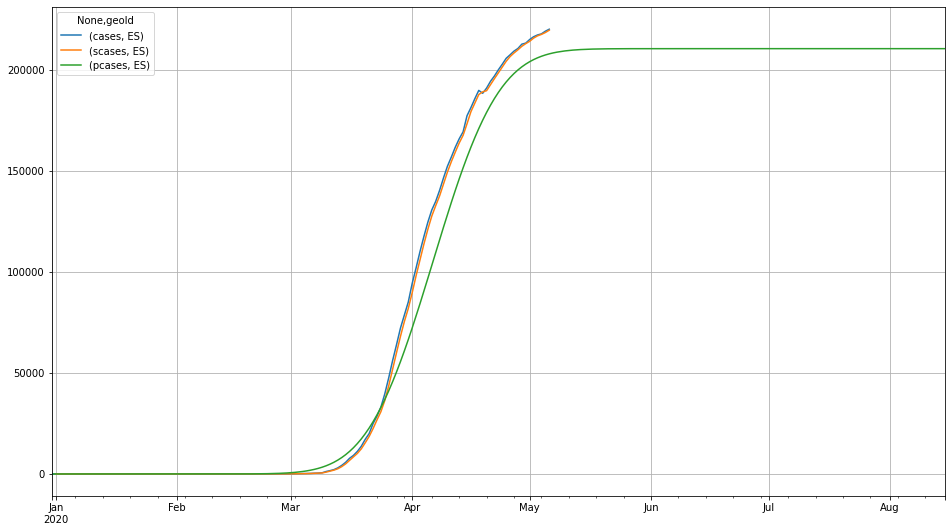

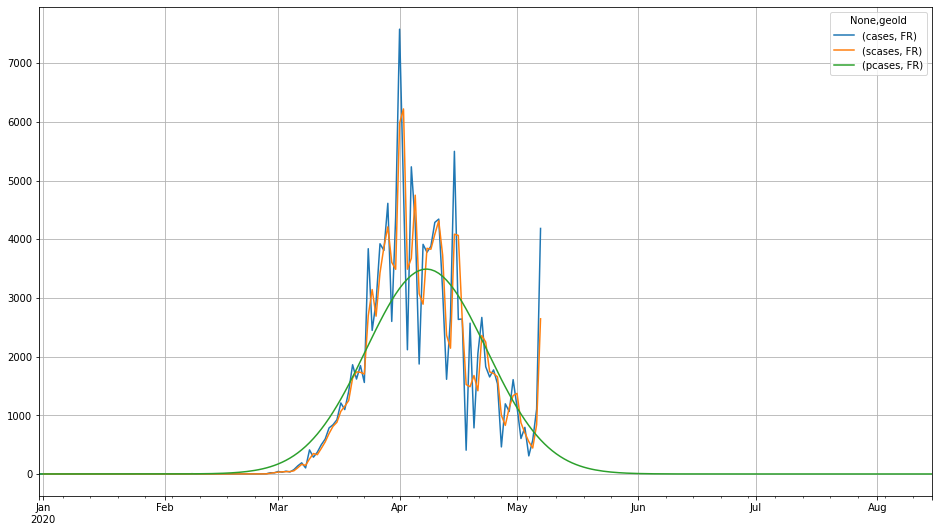

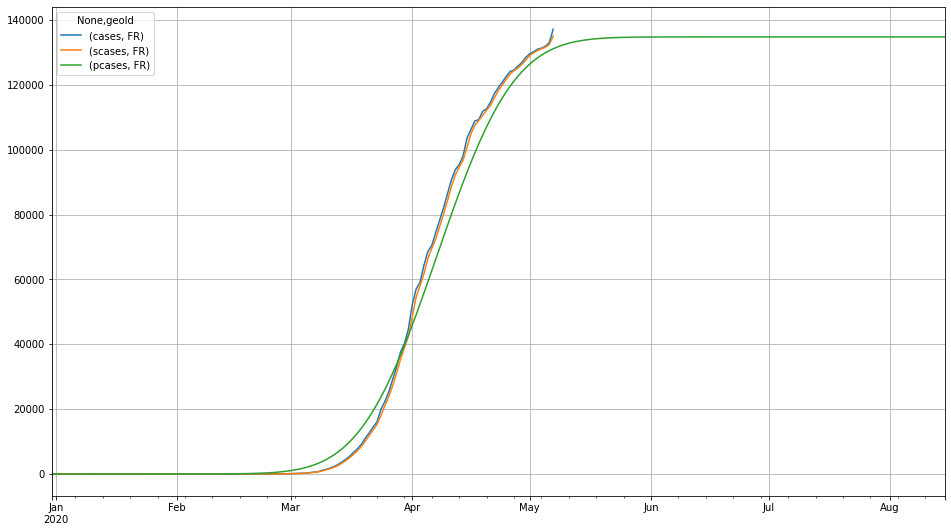

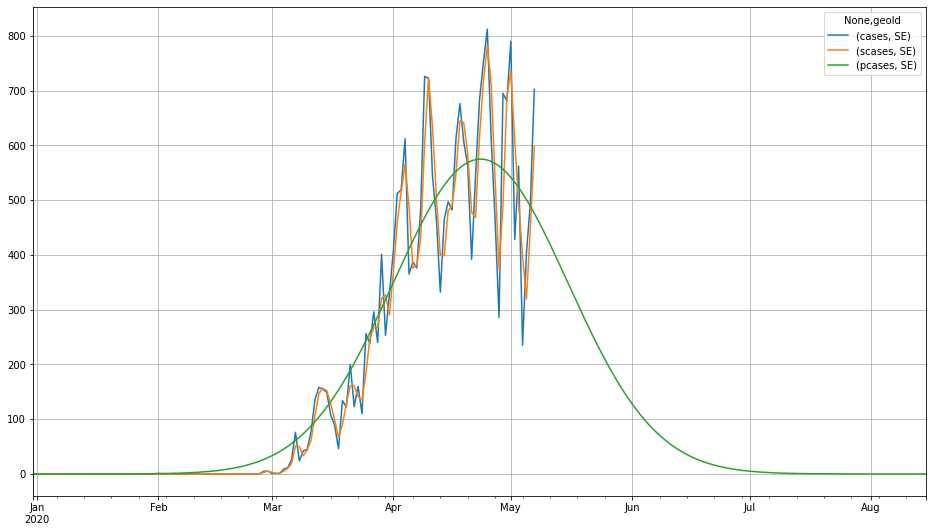

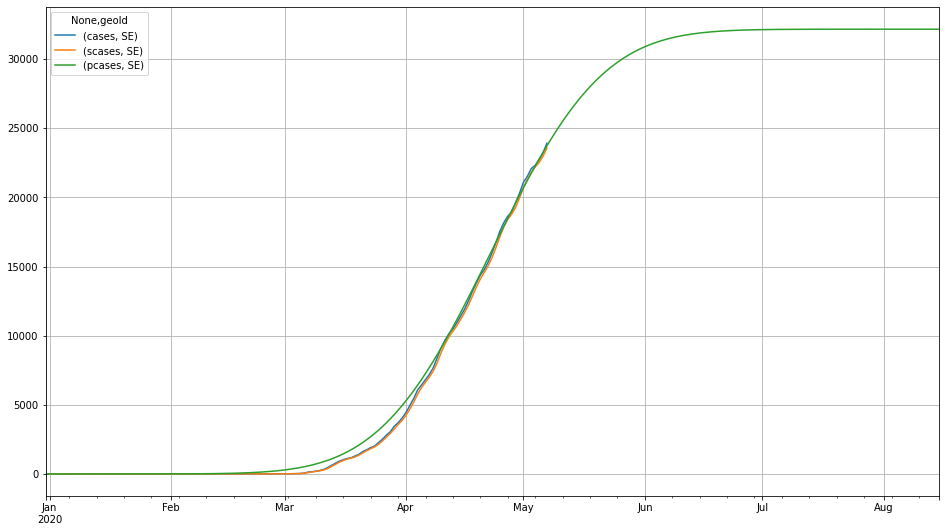

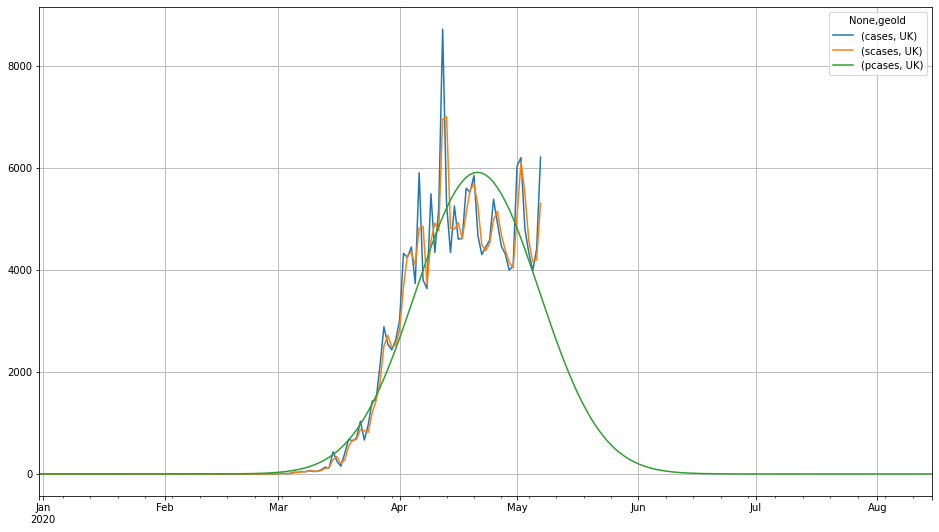

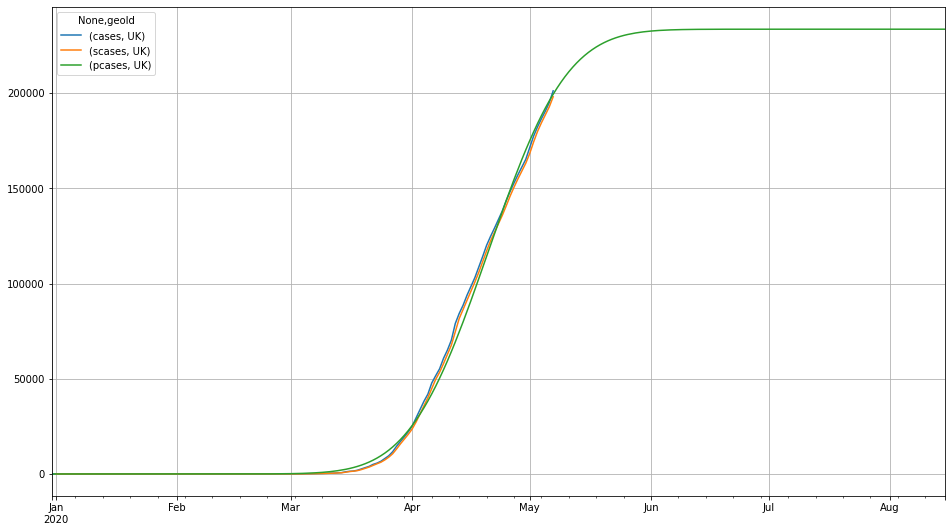

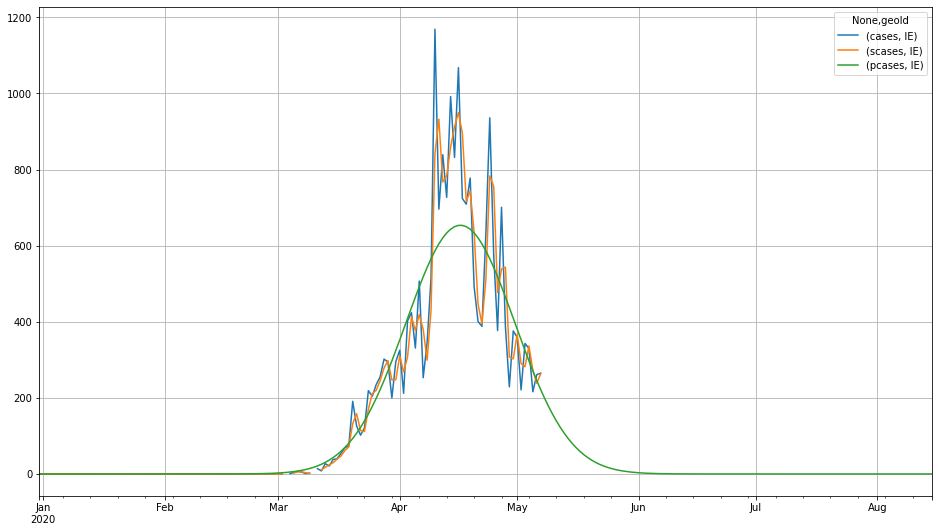

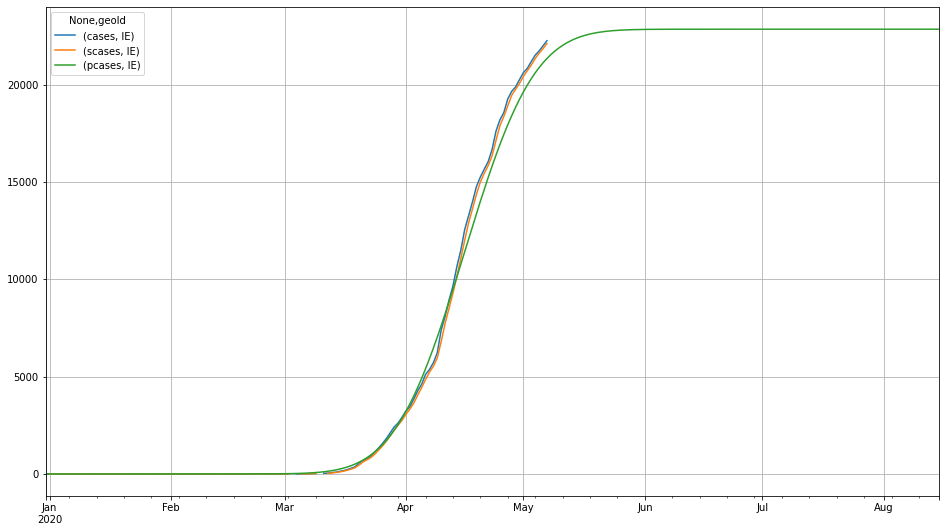

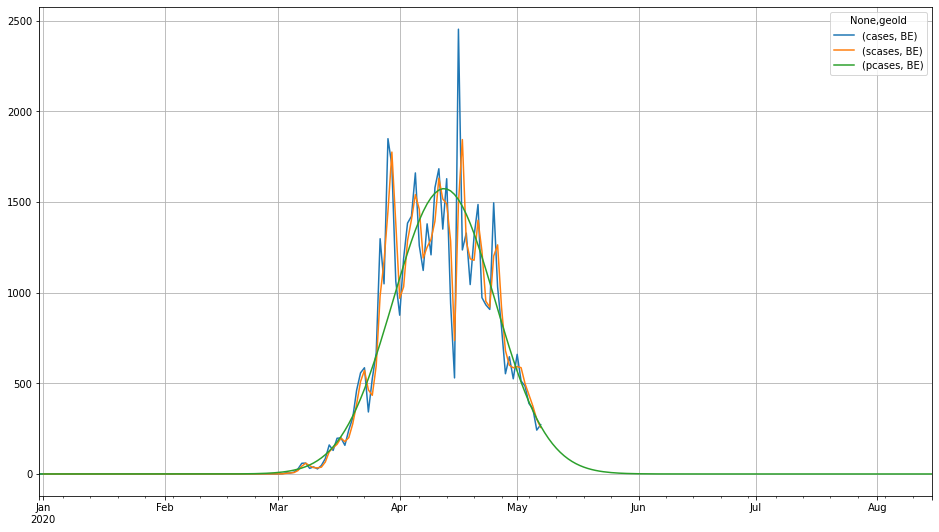

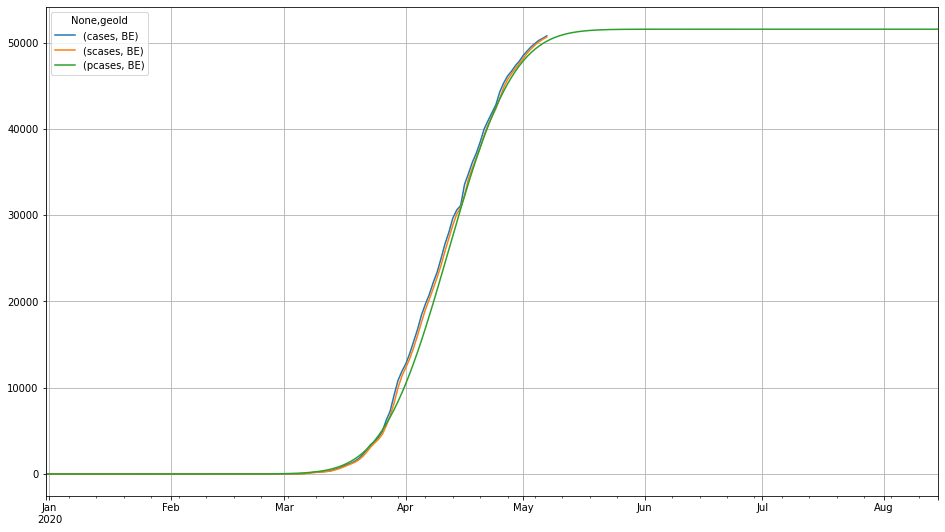

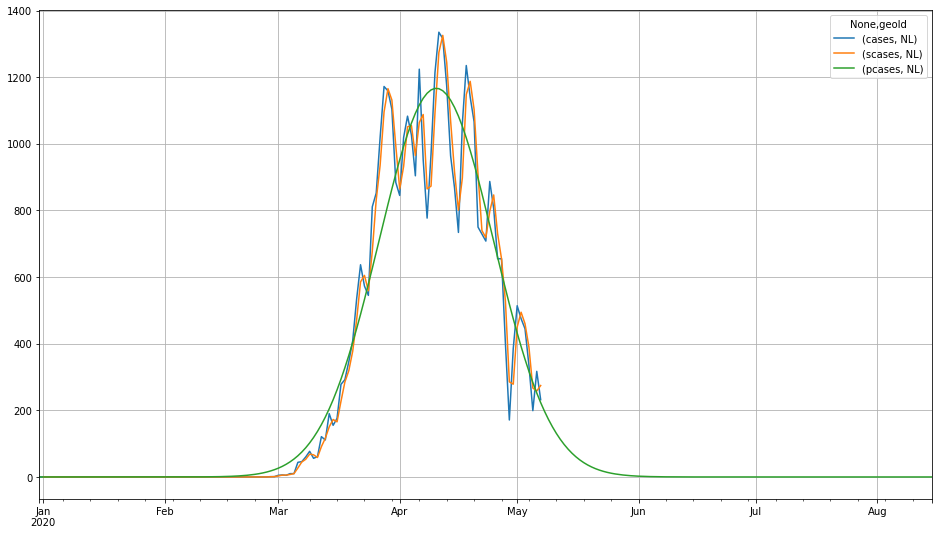

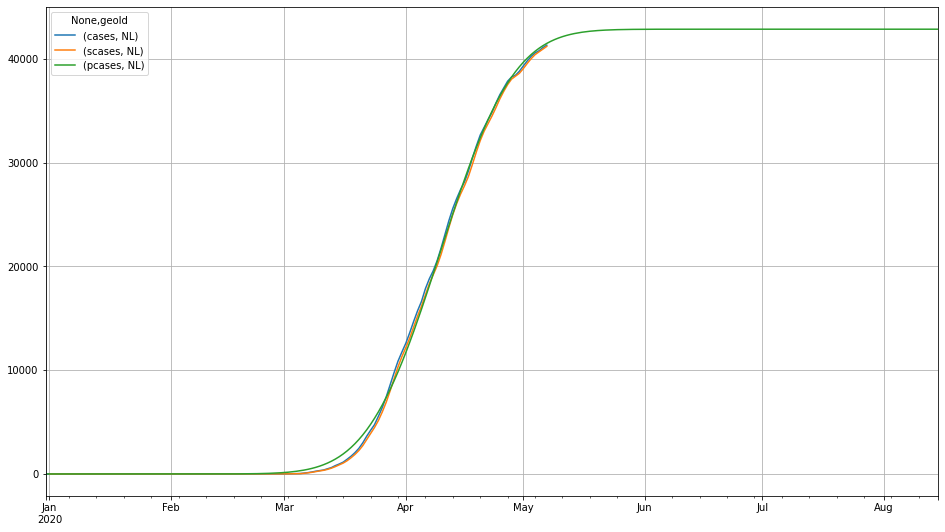

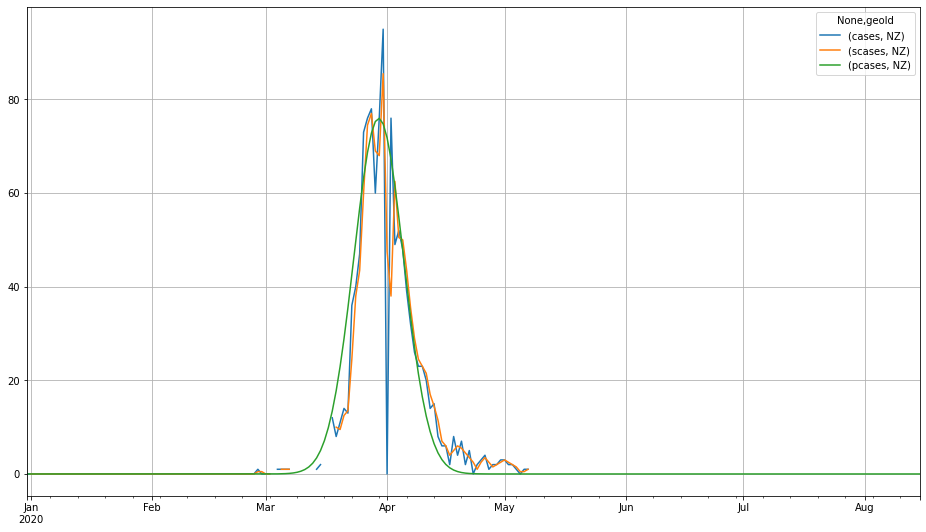

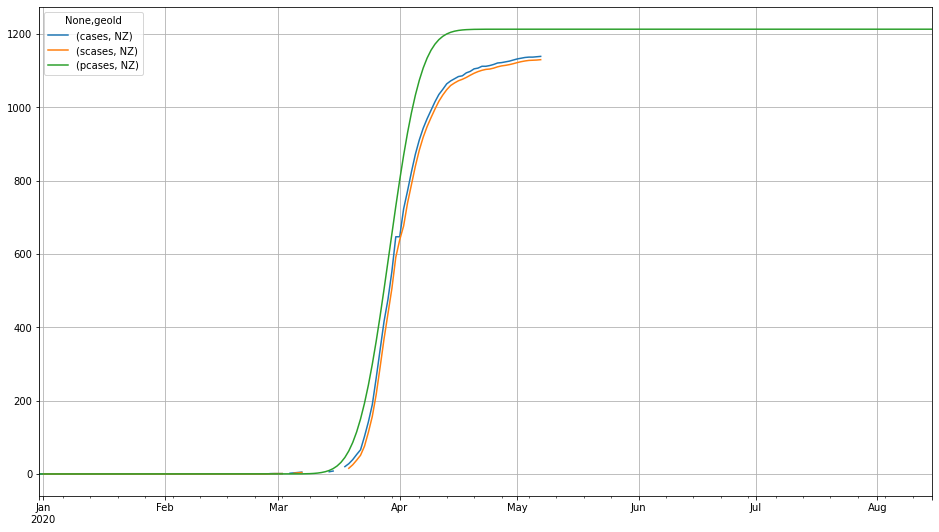

In [65]:
# countries = df['geoId'].unique()

countries = ['JP', 'RU', 'US', 'BR', 'AT', 'CH', 'DE', 'IT', 'ES', 'FR', 'SE', 'UK', 'IE', 'BE', 'NL', 'NZ']

measure  = 'cases'
pmeasure = 'pcases'
smeasure = 'scases'

for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(2).mean()
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[smeasure][country]})
    df_pred = df_pred[df_pred['y'] > df[df['geoId'] == country]['popData2018'].iloc[0] / 1e5]
    df_pred['y'] = np.log10(df_pred['y'])
    if len(df_pred) > 7:
        fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
        df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
        print(country, "factors", fit[0], "residuals", fit[1][0])
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)
        df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.